# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
import pandas as pd
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

2023-01-25 11:25:08.928520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
### Data generation
X,y = make_moons(n_samples=250, noise=0.2, random_state=0)


([], [])

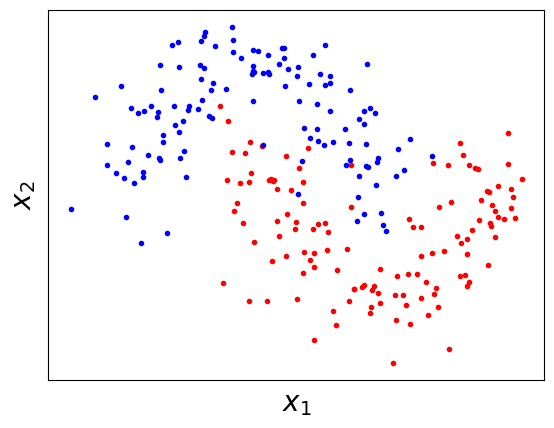

In [3]:
### This function allows to plot the two moons
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r.")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.xticks([])
plt.yticks([])


❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

([], [])

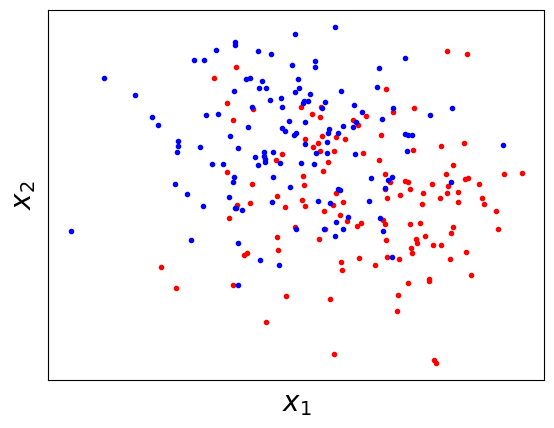

In [4]:
X2,y2 = make_moons(n_samples=250, noise=0.8, random_state=0)

plt.plot(X2[:, 0][y2==1], X2[:, 1][y2==1], "r.")
plt.plot(X2[:, 0][y2==0], X2[:, 1][y2==0], "b.")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.xticks([])
plt.yticks([])

([], [])

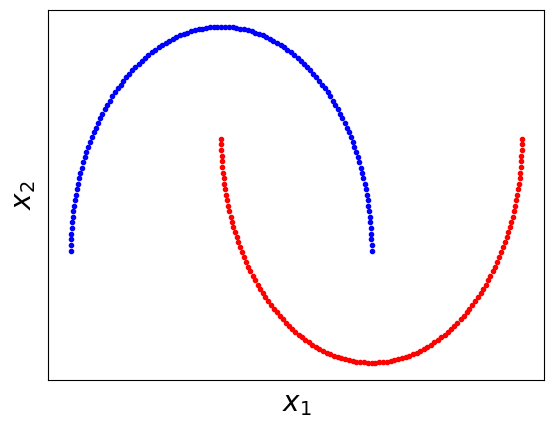

In [6]:
X3,y3 = make_moons(n_samples=250, noise=0, random_state=0)

plt.plot(X3[:, 0][y3==1], X3[:, 1][y3==1], "r.")
plt.plot(X3[:, 0][y3==0], X3[:, 1][y3==0], "b.")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.xticks([])
plt.yticks([])

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [8]:
def initialize_model():
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

model = initialize_model()


2023-01-25 11:28:48.252228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [9]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])



In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [11]:
results = model.fit(X_train, y_train, batch_size=8, epochs=200)


Epoch 1/200
22/22 [==============================] - 0s 842us/step - loss: 0.7765 - accuracy: 0.5086
Epoch 2/200
22/22 [==============================] - 0s 753us/step - loss: 0.7527 - accuracy: 0.5086
Epoch 3/200
22/22 [==============================] - 0s 795us/step - loss: 0.7299 - accuracy: 0.5086
Epoch 4/200
22/22 [==============================] - 0s 807us/step - loss: 0.7086 - accuracy: 0.5086
Epoch 5/200
22/22 [==============================] - 0s 730us/step - loss: 0.6892 - accuracy: 0.5143
Epoch 6/200
22/22 [==============================] - 0s 746us/step - loss: 0.6710 - accuracy: 0.5200
Epoch 7/200
22/22 [==============================] - 0s 705us/step - loss: 0.6537 - accuracy: 0.5314
Epoch 8/200
22/22 [==============================] - 0s 728us/step - loss: 0.6381 - accuracy: 0.5429
Epoch 9/200
22/22 [==============================] - 0s 706us/step - loss: 0.6224 - accuracy: 0.5543
Epoch 10/200
22/22 [==============================] - 0s 734us/step - loss: 0.6084 - accura

22/22 [==============================] - 0s 772us/step - loss: 0.3492 - accuracy: 0.8571
Epoch 82/200
22/22 [==============================] - 0s 803us/step - loss: 0.3481 - accuracy: 0.8571
Epoch 83/200
22/22 [==============================] - 0s 893us/step - loss: 0.3470 - accuracy: 0.8571
Epoch 84/200
22/22 [==============================] - 0s 791us/step - loss: 0.3459 - accuracy: 0.8571
Epoch 85/200
22/22 [==============================] - 0s 803us/step - loss: 0.3449 - accuracy: 0.8571
Epoch 86/200
22/22 [==============================] - 0s 789us/step - loss: 0.3439 - accuracy: 0.8571
Epoch 87/200
22/22 [==============================] - 0s 781us/step - loss: 0.3429 - accuracy: 0.8571
Epoch 88/200
22/22 [==============================] - 0s 805us/step - loss: 0.3421 - accuracy: 0.8629
Epoch 89/200
22/22 [==============================] - 0s 797us/step - loss: 0.3409 - accuracy: 0.8571
Epoch 90/200
22/22 [==============================] - 0s 799us/step - loss: 0.3403 - accuracy: 

22/22 [==============================] - 0s 819us/step - loss: 0.3003 - accuracy: 0.8743
Epoch 161/200
22/22 [==============================] - 0s 798us/step - loss: 0.2999 - accuracy: 0.8743
Epoch 162/200
22/22 [==============================] - 0s 845us/step - loss: 0.2995 - accuracy: 0.8743
Epoch 163/200
22/22 [==============================] - 0s 846us/step - loss: 0.2990 - accuracy: 0.8800
Epoch 164/200
22/22 [==============================] - 0s 847us/step - loss: 0.2988 - accuracy: 0.8857
Epoch 165/200
22/22 [==============================] - 0s 811us/step - loss: 0.2984 - accuracy: 0.8800
Epoch 166/200
22/22 [==============================] - 0s 812us/step - loss: 0.2982 - accuracy: 0.8800
Epoch 167/200
22/22 [==============================] - 0s 835us/step - loss: 0.2979 - accuracy: 0.8857
Epoch 168/200
22/22 [==============================] - 0s 702us/step - loss: 0.2977 - accuracy: 0.8857
Epoch 169/200
22/22 [==============================] - 0s 718us/step - loss: 0.2977 - a

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [12]:
model.history.__dict__


{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f9678095ab0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.7764587998390198,
   0.7526687979698181,
   0.7299018502235413,
   0.7085728645324707,
   0.6891545653343201,
   0.6710180640220642,
   0.6536687016487122,
   0.6380776762962341,
   0.6224454045295715,
   0.608447790145874,
   0.5949828028678894,
   0.5828222036361694,
   0.5713135004043579,
   0.5604424476623535,
   0.5501521229743958,
   0.5411254167556763,
   0.5321394801139832,
   0.523749589920044,
   0.5162299275398254,
   0.508750855922699,
   0.5017789602279663,
   0.49499833583831787,
   0.48882219195365906,
   0.4828259348869324,
   0.47730356454849243,
   0.4718989431858063,
   0.4665709435939789,
   0.4617963135242462,
   0.4569704234600067,
   0.4521857500076294,
   0.4478909373283386,
   0.4440324604511261,
   0.4397743344306946,
   0.4361756145954132,
   0.43258562684059143,
   0.4294963777065277,
  

In [13]:
df= pd.DataFrame(model.history.history)

❓ Plot the history of the train loss using the following function

In [14]:
df


,loss,accuracy
0,0.776459,0.508571
1,0.752669,0.508571
2,0.729902,0.508571
3,0.708573,0.508571
4,0.689155,0.514286
...,...,...
195,0.291218,0.880000
196,0.291049,0.885714
197,0.290965,0.880000
198,0.290601,0.885714


<AxesSubplot: >

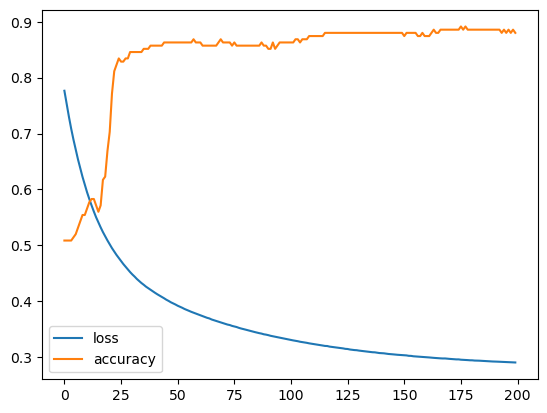

In [15]:
df.plot()


### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [16]:
y_pred = model.predict(X_test)
print(y_pred)

3/3 [==============================] - 0s 1ms/step
[[0.64448506]
 [0.8636862 ]
 [0.3403987 ]
 [0.8636862 ]
 [0.8636862 ]
 [0.8636862 ]
 [0.8636862 ]
 [0.61704594]
 [0.8636862 ]
 [0.05624871]
 [0.8636862 ]
 [0.02218801]
 [0.8636862 ]
 [0.14034632]
 [0.8636862 ]
 [0.28902486]
 [0.7516385 ]
 [0.00734297]
 [0.83659005]
 [0.8636862 ]
 [0.01415394]
 [0.01404568]
 [0.02886809]
 [0.10964128]
 [0.01875874]
 [0.0010157 ]
 [0.01131427]
 [0.8636862 ]
 [0.8636862 ]
 [0.8636862 ]
 [0.49382085]
 [0.8636862 ]
 [0.6667    ]
 [0.01049417]
 [0.01549438]
 [0.8636862 ]
 [0.6176366 ]
 [0.0012211 ]
 [0.00520098]
 [0.8636862 ]
 [0.8636862 ]
 [0.2869292 ]
 [0.8636862 ]
 [0.8628635 ]
 [0.00645728]
 [0.8636862 ]
 [0.00171027]
 [0.8636862 ]
 [0.00213523]
 [0.21617424]
 [0.068018  ]
 [0.8636862 ]
 [0.01490222]
 [0.5776991 ]
 [0.01689954]
 [0.12201325]
 [0.8636862 ]
 [0.8636862 ]
 [0.86185175]
 [0.8636862 ]
 [0.00975863]
 [0.00311237]
 [0.00769178]
 [0.01946558]
 [0.7313503 ]
 [0.8636862 ]
 [0.01969036]
 [0.0011474

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [17]:
metrics = model.evaluate(X_test, y_test)

print(metrics)



3/3 [==============================] - 0s 1ms/step - loss: 0.2437 - accuracy: 0.8933
[0.2437470257282257, 0.8933333158493042]


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [18]:
accuracy = float(metrics[1])
print(accuracy)



0.8933333158493042


❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

In [19]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """Plot the 2D-decision region of a classifier with matplotlib along its first two dimensions X[:,0] and X[:,1].

    Args:
        X (np.Array): (n,p) dataset to classify
        y (np.Array): (n,) array of labels. Works well up to 5 unique labels.
        classifier: fitted classifier with `.predict()` method 
        test_idx (int, optional):  Index of test datapoints within X to display with a larger mark style. Defaults to None.
        resolution (float, optional): Resolution of the meshgrid used to colorize regions. Defaults to 0.02.
    """

    # setup marker generator and color map up for up to 5 classes
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='x', label=cl)

    # Plot test samples if they exist
    if not test_idx is None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                        alpha=1, color=cmap(idx),
                        linewidths=1, marker='o', s=55, label=f'test {cl}')
    plt.legend()




1842/1842 [==============================] - 1s 413us/step


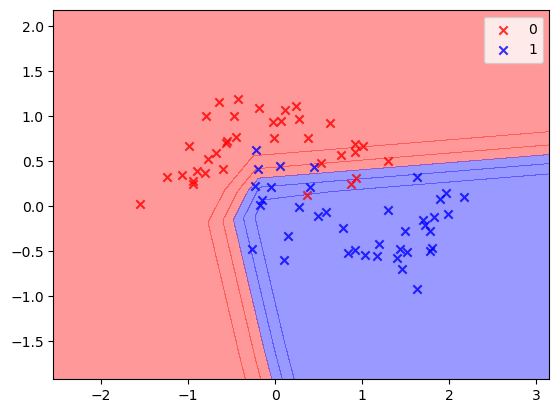

In [20]:
plot_decision_regions(X_test, y_test, model, test_idx=None, resolution=0.02)

1940/1940 [==============================] - 1s 412us/step


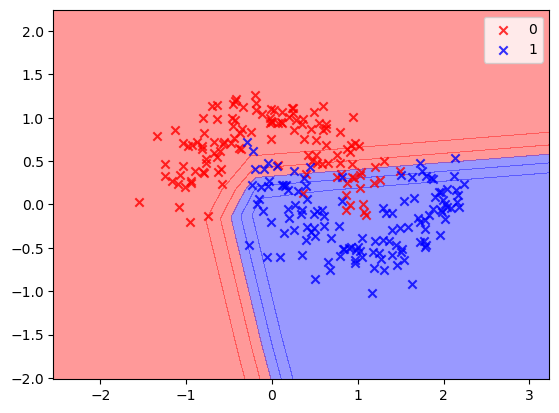

In [21]:
plot_decision_regions(X, y, model, test_idx=None, resolution=0.02)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
22/22 [==============================] - 0s 781us/step - loss: 0.8004 - accuracy: 0.2800
Epoch 2/500
22/22 [==============================] - 0s 749us/step - loss: 0.7740 - accuracy: 0.2857
Epoch 3/500
22/22 [==============================] - 0s 752us/step - loss: 0.7501 - accuracy: 0.3086
Epoch 4/500
22/22 [==============================] - 0s 747us/step - loss: 0.7276 - accuracy: 0.3771
Epoch 5/500
22/22 [==============================]

22/22 [==============================] - 0s 697us/step - loss: 0.3167 - accuracy: 0.8571
Epoch 75/500
22/22 [==============================] - 0s 691us/step - loss: 0.3166 - accuracy: 0.8571
Epoch 76/500
22/22 [==============================] - 0s 675us/step - loss: 0.3158 - accuracy: 0.8571
Epoch 77/500
22/22 [==============================] - 0s 742us/step - loss: 0.3157 - accuracy: 0.8571
Epoch 78/500
22/22 [==============================] - 0s 711us/step - loss: 0.3151 - accuracy: 0.8571
Epoch 79/500
22/22 [==============================] - 0s 715us/step - loss: 0.3150 - accuracy: 0.8571
Epoch 80/500
22/22 [==============================] - 0s 701us/step - loss: 0.3147 - accuracy: 0.8571
Epoch 81/500
22/22 [==============================] - 0s 715us/step - loss: 0.3145 - accuracy: 0.8629
Epoch 82/500
22/22 [==============================] - 0s 709us/step - loss: 0.3141 - accuracy: 0.8571
Epoch 83/500
22/22 [==============================] - 0s 722us/step - loss: 0.3139 - accuracy: 

22/22 [==============================] - 0s 719us/step - loss: 0.3059 - accuracy: 0.8514
Epoch 154/500
22/22 [==============================] - 0s 689us/step - loss: 0.3058 - accuracy: 0.8514
Epoch 155/500
22/22 [==============================] - 0s 690us/step - loss: 0.3059 - accuracy: 0.8514
Epoch 156/500
22/22 [==============================] - 0s 708us/step - loss: 0.3057 - accuracy: 0.8514
Epoch 157/500
22/22 [==============================] - 0s 721us/step - loss: 0.3058 - accuracy: 0.8514
Epoch 158/500
22/22 [==============================] - 0s 705us/step - loss: 0.3061 - accuracy: 0.8514
Epoch 159/500
22/22 [==============================] - 0s 712us/step - loss: 0.3057 - accuracy: 0.8514
Epoch 160/500
22/22 [==============================] - 0s 705us/step - loss: 0.3058 - accuracy: 0.8514
Epoch 161/500
22/22 [==============================] - 0s 685us/step - loss: 0.3058 - accuracy: 0.8514
Epoch 162/500
22/22 [==============================] - 0s 684us/step - loss: 0.3057 - a

22/22 [==============================] - 0s 686us/step - loss: 0.3043 - accuracy: 0.8571
Epoch 233/500
22/22 [==============================] - 0s 691us/step - loss: 0.3044 - accuracy: 0.8571
Epoch 234/500
22/22 [==============================] - 0s 672us/step - loss: 0.3043 - accuracy: 0.8571
Epoch 235/500
22/22 [==============================] - 0s 688us/step - loss: 0.3050 - accuracy: 0.8514
Epoch 236/500
22/22 [==============================] - 0s 706us/step - loss: 0.3046 - accuracy: 0.8514
Epoch 237/500
22/22 [==============================] - 0s 680us/step - loss: 0.3042 - accuracy: 0.8571
Epoch 238/500
22/22 [==============================] - 0s 690us/step - loss: 0.3041 - accuracy: 0.8571
Epoch 239/500
22/22 [==============================] - 0s 685us/step - loss: 0.3041 - accuracy: 0.8571
Epoch 240/500
22/22 [==============================] - 0s 696us/step - loss: 0.3041 - accuracy: 0.8514
Epoch 241/500
22/22 [==============================] - 0s 701us/step - loss: 0.3045 - a

22/22 [==============================] - 0s 702us/step - loss: 0.3028 - accuracy: 0.8514
Epoch 312/500
22/22 [==============================] - 0s 681us/step - loss: 0.3030 - accuracy: 0.8571
Epoch 313/500
22/22 [==============================] - 0s 696us/step - loss: 0.3030 - accuracy: 0.8514
Epoch 314/500
22/22 [==============================] - 0s 693us/step - loss: 0.3032 - accuracy: 0.8514
Epoch 315/500
22/22 [==============================] - 0s 684us/step - loss: 0.3027 - accuracy: 0.8571
Epoch 316/500
22/22 [==============================] - 0s 707us/step - loss: 0.3026 - accuracy: 0.8514
Epoch 317/500
22/22 [==============================] - 0s 678us/step - loss: 0.3028 - accuracy: 0.8514
Epoch 318/500
22/22 [==============================] - 0s 695us/step - loss: 0.3028 - accuracy: 0.8514
Epoch 319/500
22/22 [==============================] - 0s 685us/step - loss: 0.3032 - accuracy: 0.8571
Epoch 320/500
22/22 [==============================] - 0s 694us/step - loss: 0.3025 - a

22/22 [==============================] - 0s 700us/step - loss: 0.3016 - accuracy: 0.8514
Epoch 391/500
22/22 [==============================] - 0s 692us/step - loss: 0.3014 - accuracy: 0.8514
Epoch 392/500
22/22 [==============================] - 0s 689us/step - loss: 0.3014 - accuracy: 0.8514
Epoch 393/500
22/22 [==============================] - 0s 731us/step - loss: 0.3014 - accuracy: 0.8514
Epoch 394/500
22/22 [==============================] - 0s 690us/step - loss: 0.3017 - accuracy: 0.8457
Epoch 395/500
22/22 [==============================] - 0s 705us/step - loss: 0.3011 - accuracy: 0.8514
Epoch 396/500
22/22 [==============================] - 0s 689us/step - loss: 0.3011 - accuracy: 0.8514
Epoch 397/500
22/22 [==============================] - 0s 684us/step - loss: 0.3010 - accuracy: 0.8514
Epoch 398/500
22/22 [==============================] - 0s 682us/step - loss: 0.3014 - accuracy: 0.8514
Epoch 399/500
22/22 [==============================] - 0s 688us/step - loss: 0.3013 - a

22/22 [==============================] - 0s 684us/step - loss: 0.3000 - accuracy: 0.8571
Epoch 470/500
22/22 [==============================] - 0s 703us/step - loss: 0.2998 - accuracy: 0.8571
Epoch 471/500
22/22 [==============================] - 0s 696us/step - loss: 0.2996 - accuracy: 0.8571
Epoch 472/500
22/22 [==============================] - 0s 681us/step - loss: 0.2996 - accuracy: 0.8571
Epoch 473/500
22/22 [==============================] - 0s 708us/step - loss: 0.2995 - accuracy: 0.8571
Epoch 474/500
22/22 [==============================] - 0s 676us/step - loss: 0.3002 - accuracy: 0.8514
Epoch 475/500
22/22 [==============================] - 0s 687us/step - loss: 0.2993 - accuracy: 0.8571
Epoch 476/500
22/22 [==============================] - 0s 685us/step - loss: 0.2995 - accuracy: 0.8571
Epoch 477/500
22/22 [==============================] - 0s 692us/step - loss: 0.2993 - accuracy: 0.8571
Epoch 478/500
22/22 [==============================] - 0s 680us/step - loss: 0.2993 - a

<AxesSubplot: >

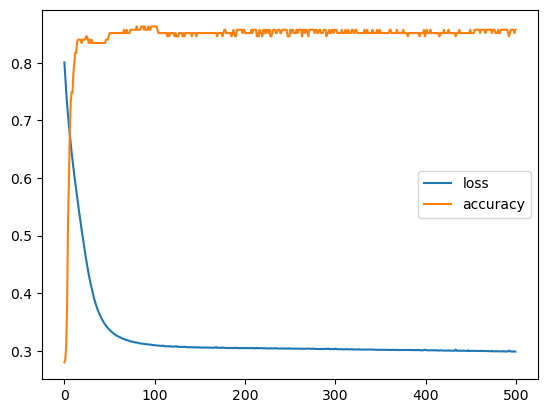

In [25]:
model = initialize_model()
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.summary()
results = model.fit(X_train, y_train, batch_size=8, epochs=500)
df= pd.DataFrame(model.history.history)
df.plot()


3/3 [==============================] - 0s 1ms/step - loss: 0.2587 - accuracy: 0.8800
[0.25874191522598267, 0.8799999952316284]
1842/1842 [==============================] - 1s 420us/step
0.8799999952316284


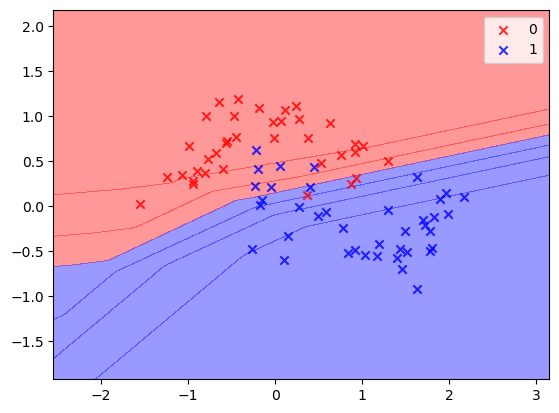

In [26]:
y_pred = model.predict(X_test)
metrics = model.evaluate(X_test, y_test)
print(metrics)
plot_decision_regions(X_test, y_test, model, test_idx=None, resolution=0.02)
accuracy_500_epochs = float(metrics[1])
print(accuracy_500_epochs)

❓ Did the test accuracy improve?

The accuracy don't improve, accuracy with 200 epochs = 0.8933333158493042, accuracy with 500 epochs = 0.8799999952316284.


Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [32]:
def initialize_model():
    model = Sequential()
    model.add(Dense(20, input_dim=2, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

model = initialize_model()


❓ What is the number of parameters of your new model?

In [33]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                60        
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

Epoch 1/500
22/22 [==============================] - 0s 878us/step - loss: 0.6871 - accuracy: 0.5886
Epoch 2/500
22/22 [==============================] - 0s 799us/step - loss: 0.6677 - accuracy: 0.6514
Epoch 3/500
22/22 [==============================] - 0s 798us/step - loss: 0.6430 - accuracy: 0.6914
Epoch 4/500
22/22 [==============================] - 0s 835us/step - loss: 0.6052 - accuracy: 0.7314
Epoch 5/500
22/22 [==============================] - 0s 809us/step - loss: 0.5522 - accuracy: 0.7829
Epoch 6/500
22/22 [==============================] - 0s 797us/step - loss: 0.4917 - accuracy: 0.8114
Epoch 7/500
22/22 [==============================] - 0s 761us/step - loss: 0.4403 - accuracy: 0.8286
Epoch 8/500
22/22 [==============================] - 0s 768us/step - loss: 0.4011 - accuracy: 0.8229
Epoch 9/500
22/22 [==============================] - 0s 769us/step - loss: 0.3743 - accuracy: 0.8514
Epoch 10/500
22/22 [==============================] - 0s 760us/step - loss: 0.3580 - accura

22/22 [==============================] - 0s 928us/step - loss: 0.1528 - accuracy: 0.9486
Epoch 82/500
22/22 [==============================] - 0s 884us/step - loss: 0.1506 - accuracy: 0.9371
Epoch 83/500
22/22 [==============================] - 0s 878us/step - loss: 0.1494 - accuracy: 0.9429
Epoch 84/500
22/22 [==============================] - 0s 888us/step - loss: 0.1471 - accuracy: 0.9486
Epoch 85/500
22/22 [==============================] - 0s 915us/step - loss: 0.1446 - accuracy: 0.9314
Epoch 86/500
22/22 [==============================] - 0s 889us/step - loss: 0.1411 - accuracy: 0.9429
Epoch 87/500
22/22 [==============================] - 0s 893us/step - loss: 0.1395 - accuracy: 0.9486
Epoch 88/500
22/22 [==============================] - 0s 935us/step - loss: 0.1370 - accuracy: 0.9543
Epoch 89/500
22/22 [==============================] - 0s 890us/step - loss: 0.1362 - accuracy: 0.9543
Epoch 90/500
22/22 [==============================] - 0s 919us/step - loss: 0.1362 - accuracy: 

22/22 [==============================] - 0s 837us/step - loss: 0.0849 - accuracy: 0.9657
Epoch 161/500
22/22 [==============================] - 0s 857us/step - loss: 0.0891 - accuracy: 0.9600
Epoch 162/500
22/22 [==============================] - 0s 806us/step - loss: 0.0846 - accuracy: 0.9657
Epoch 163/500
22/22 [==============================] - 0s 906us/step - loss: 0.0834 - accuracy: 0.9657
Epoch 164/500
22/22 [==============================] - 0s 778us/step - loss: 0.0841 - accuracy: 0.9657
Epoch 165/500
22/22 [==============================] - 0s 755us/step - loss: 0.0856 - accuracy: 0.9657
Epoch 166/500
22/22 [==============================] - 0s 792us/step - loss: 0.0828 - accuracy: 0.9714
Epoch 167/500
22/22 [==============================] - 0s 775us/step - loss: 0.0844 - accuracy: 0.9657
Epoch 168/500
22/22 [==============================] - 0s 774us/step - loss: 0.0831 - accuracy: 0.9657
Epoch 169/500
22/22 [==============================] - 0s 776us/step - loss: 0.0852 - a

22/22 [==============================] - 0s 877us/step - loss: 0.0757 - accuracy: 0.9714
Epoch 241/500
22/22 [==============================] - 0s 891us/step - loss: 0.0773 - accuracy: 0.9714
Epoch 242/500
22/22 [==============================] - 0s 914us/step - loss: 0.0735 - accuracy: 0.9657
Epoch 243/500
22/22 [==============================] - 0s 898us/step - loss: 0.0739 - accuracy: 0.9657
Epoch 244/500
22/22 [==============================] - 0s 853us/step - loss: 0.0748 - accuracy: 0.9714
Epoch 245/500
22/22 [==============================] - 0s 768us/step - loss: 0.0737 - accuracy: 0.9771
Epoch 246/500
22/22 [==============================] - 0s 787us/step - loss: 0.0736 - accuracy: 0.9714
Epoch 247/500
22/22 [==============================] - 0s 762us/step - loss: 0.0769 - accuracy: 0.9657
Epoch 248/500
22/22 [==============================] - 0s 771us/step - loss: 0.0729 - accuracy: 0.9714
Epoch 249/500
22/22 [==============================] - 0s 766us/step - loss: 0.0719 - a

22/22 [==============================] - 0s 910us/step - loss: 0.0653 - accuracy: 0.9714
Epoch 320/500
22/22 [==============================] - 0s 904us/step - loss: 0.0660 - accuracy: 0.9714
Epoch 321/500
22/22 [==============================] - 0s 910us/step - loss: 0.0640 - accuracy: 0.9771
Epoch 322/500
22/22 [==============================] - 0s 907us/step - loss: 0.0654 - accuracy: 0.9714
Epoch 323/500
22/22 [==============================] - 0s 915us/step - loss: 0.0667 - accuracy: 0.9714
Epoch 324/500
22/22 [==============================] - 0s 897us/step - loss: 0.0660 - accuracy: 0.9714
Epoch 325/500
22/22 [==============================] - 0s 887us/step - loss: 0.0654 - accuracy: 0.9771
Epoch 326/500
22/22 [==============================] - 0s 898us/step - loss: 0.0656 - accuracy: 0.9714
Epoch 327/500
22/22 [==============================] - 0s 887us/step - loss: 0.0632 - accuracy: 0.9771
Epoch 328/500
22/22 [==============================] - 0s 892us/step - loss: 0.0642 - a

22/22 [==============================] - 0s 862us/step - loss: 0.0577 - accuracy: 0.9714
Epoch 399/500
22/22 [==============================] - 0s 802us/step - loss: 0.0621 - accuracy: 0.9714
Epoch 400/500
22/22 [==============================] - 0s 875us/step - loss: 0.0555 - accuracy: 0.9771
Epoch 401/500
22/22 [==============================] - 0s 796us/step - loss: 0.0587 - accuracy: 0.9714
Epoch 402/500
22/22 [==============================] - 0s 767us/step - loss: 0.0556 - accuracy: 0.9714
Epoch 403/500
22/22 [==============================] - 0s 764us/step - loss: 0.0601 - accuracy: 0.9714
Epoch 404/500
22/22 [==============================] - 0s 752us/step - loss: 0.0559 - accuracy: 0.9829
Epoch 405/500
22/22 [==============================] - 0s 754us/step - loss: 0.0565 - accuracy: 0.9771
Epoch 406/500
22/22 [==============================] - 0s 780us/step - loss: 0.0580 - accuracy: 0.9714
Epoch 407/500
22/22 [==============================] - 0s 761us/step - loss: 0.0570 - a

22/22 [==============================] - 0s 763us/step - loss: 0.0501 - accuracy: 0.9829
Epoch 478/500
22/22 [==============================] - 0s 905us/step - loss: 0.0512 - accuracy: 0.9829
Epoch 479/500
22/22 [==============================] - 0s 892us/step - loss: 0.0499 - accuracy: 0.9829
Epoch 480/500
22/22 [==============================] - 0s 832us/step - loss: 0.0514 - accuracy: 0.9714
Epoch 481/500
22/22 [==============================] - 0s 776us/step - loss: 0.0509 - accuracy: 0.9714
Epoch 482/500
22/22 [==============================] - 0s 777us/step - loss: 0.0509 - accuracy: 0.9829
Epoch 483/500
22/22 [==============================] - 0s 769us/step - loss: 0.0531 - accuracy: 0.9714
Epoch 484/500
22/22 [==============================] - 0s 774us/step - loss: 0.0507 - accuracy: 0.9829
Epoch 485/500
22/22 [==============================] - 0s 762us/step - loss: 0.0521 - accuracy: 0.9771
Epoch 486/500
22/22 [==============================] - 0s 756us/step - loss: 0.0511 - a

<AxesSubplot: >

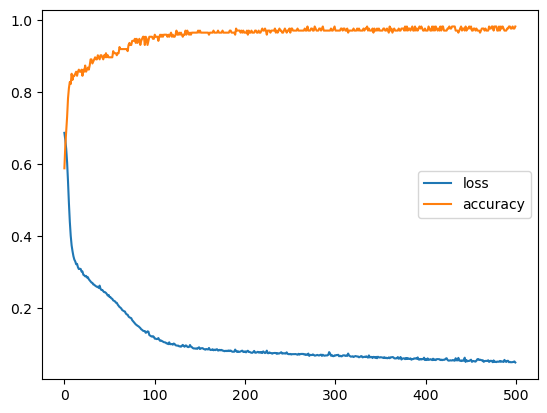

In [34]:
results = model.fit(X_train, y_train, batch_size=8, epochs=500)
df= pd.DataFrame(model.history.history)
df.plot()

In [30]:
y_pred = model.predict(X_test)
metrics = model.evaluate(X_test, y_test)
print(metrics)
accuracy_deep = metrics[1]
print(accuracy_deep)

3/3 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.9600
[0.23014111816883087, 0.9599999785423279]
0.9599999785423279


❓ Do you think we have overfitted on the noise? Check it out below

1940/1940 [==============================] - 1s 426us/step


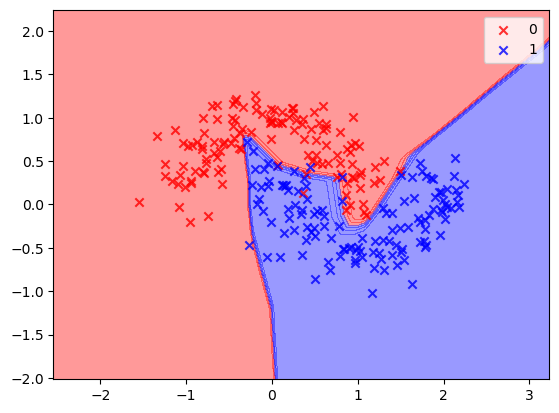

In [31]:
plot_decision_regions(X, y, model, test_idx=None, resolution=0.02)



The accuracy improve (0.9599999785423279) but I think i have overfitted my model, we can see on the metrics plot the plot the loss curves and accuracy curves are moving away and on the result plot we can see the curves are too close to the shape of the points.
